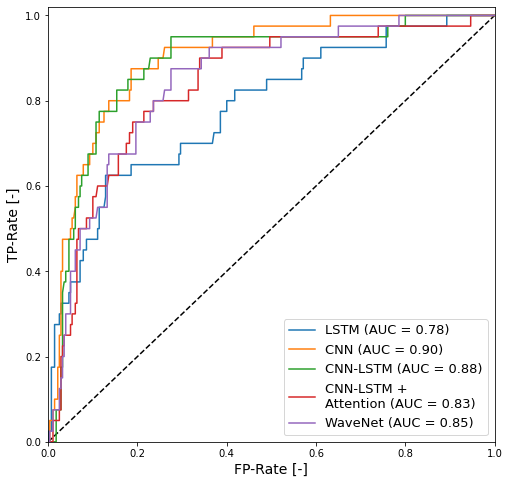

In [2]:
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import metrics

TPR = {
    "LSTM": [0.0,0.025,0.025,0.175,0.175,0.275,0.275,0.3,0.3,0.325,0.325,0.325,0.325,0.35,0.35,0.375,0.375,0.425,0.425,0.45,0.45,0.475,0.475,0.5,0.5,0.55,0.55,0.575,0.625,0.625,0.65,0.65,0.675,0.675,0.7,0.7,0.725,0.725,0.775,0.775,0.8,0.8,0.825,0.825,0.85,0.85,0.875,0.875,0.9,0.9,0.925,0.925,0.925,0.925,0.925,0.925,0.975,0.975,0.975,0.975,0.975,0.975,1.0,1.0,1.0,1.0,1.0,1.0,],
    "CNN": [0.0,0.0,0.05,0.05,0.075,0.075,0.1,0.1,0.175,0.175,0.25,0.25,0.275,0.325,0.4,0.4,0.475,0.475,0.5,0.5,0.525,0.525,0.55,0.575,0.575,0.625,0.625,0.65,0.65,0.675,0.675,0.7,0.7,0.725,0.725,0.75,0.75,0.775,0.775,0.8,0.8,0.825,0.825,0.875,0.875,0.875,0.875,0.9,0.9,0.925,0.925,0.95,0.95,0.975,0.975,0.975,0.975,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,],
    "CNN-LSTM": [0.0,0.0,0.0,0.075,0.075,0.175,0.175,0.35,0.375,0.375,0.4,0.4,0.475,0.475,0.5,0.5,0.55,0.55,0.575,0.575,0.6,0.6,0.625,0.625,0.625,0.675,0.675,0.75,0.75,0.775,0.775,0.825,0.825,0.85,0.85,0.875,0.875,0.9,0.9,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.975,0.975,1.0,1.0,1.0,1.0,1.0,1.0,1.0,],
    "CNN-LSTM + \nAttention": [0.0,0.0,0.0,0.05,0.05,0.075,0.075,0.2,0.2,0.225,0.225,0.25,0.25,0.275,0.275,0.3,0.3,0.325,0.325,0.425,0.475,0.475,0.5,0.5,0.525,0.525,0.525,0.575,0.575,0.6,0.6,0.625,0.625,0.675,0.675,0.7,0.7,0.725,0.725,0.75,0.75,0.775,0.775,0.8,0.8,0.825,0.825,0.875,0.875,0.9,0.9,0.925,0.925,0.925,0.925,0.95,0.95,0.95,0.95,0.975,0.975,0.975,0.975,0.975,0.975,0.975,1.0,1.0,],
    "WaveNet": [0.0,0.0,0.025,0.025,0.075,0.075,0.125,0.125,0.15,0.15,0.2,0.2,0.25,0.25,0.3,0.3,0.4,0.4,0.45,0.45,0.5,0.5,0.525,0.525,0.55,0.55,0.6,0.65,0.65,0.675,0.675,0.675,0.75,0.75,0.775,0.775,0.8,0.8,0.825,0.825,0.875,0.875,0.875,0.875,0.9,0.9,0.925,0.925,0.925,0.925,0.925,0.925,0.925,0.925,0.95,0.95,0.975,0.975,1.0,1.0,1.0,1.0,1.0,1.0,],
}
FPR = {
    "LSTM": [0.0,0.0,0.007142857142857143,0.007142857142857143,0.014285714285714285,0.014285714285714285,0.025,0.025,0.02857142857142857,0.02857142857142857,0.03571428571428571,0.04285714285714286,0.04642857142857143,0.04642857142857143,0.05,0.05,0.07142857142857142,0.07142857142857142,0.07857142857142857,0.07857142857142857,0.08571428571428572,0.08571428571428572,0.11071428571428571,0.11071428571428571,0.11428571428571428,0.11428571428571428,0.125,0.12857142857142856,0.12857142857142856,0.18571428571428572,0.18571428571428572,0.29285714285714287,0.29285714285714287,0.29642857142857143,0.29642857142857143,0.3678571428571429,0.37142857142857144,0.38571428571428573,0.38571428571428573,0.4,0.4,0.41785714285714287,0.41785714285714287,0.48928571428571427,0.48928571428571427,0.5678571428571428,0.5678571428571428,0.5714285714285714,0.5714285714285714,0.6107142857142858,0.6107142857142858,0.6392857142857142,0.6464285714285715,0.6678571428571428,0.675,0.7571428571428571,0.7571428571428571,0.8392857142857143,0.8464285714285714,0.875,0.8821428571428571,0.8928571428571429,0.8928571428571429,0.9214285714285714,0.9285714285714286,0.9892857142857143,0.9964285714285714,1.0,],
    "CNN": [0.0,0.0035714285714285713,0.0035714285714285713,0.010714285714285714,0.010714285714285714,0.014285714285714285,0.014285714285714285,0.02142857142857143,0.02142857142857143,0.025,0.025,0.02857142857142857,0.02857142857142857,0.02857142857142857,0.02857142857142857,0.03214285714285714,0.03214285714285714,0.05,0.05,0.05357142857142857,0.05357142857142857,0.05714285714285714,0.060714285714285714,0.060714285714285714,0.06428571428571428,0.06428571428571428,0.07857142857142857,0.07857142857142857,0.09285714285714286,0.09285714285714286,0.1,0.1,0.10714285714285714,0.10714285714285714,0.11428571428571428,0.11428571428571428,0.125,0.125,0.1357142857142857,0.1357142857142857,0.18214285714285713,0.18214285714285713,0.18571428571428572,0.18571428571428572,0.20714285714285716,0.21428571428571427,0.24642857142857144,0.24642857142857144,0.2571428571428571,0.26071428571428573,0.3678571428571429,0.3678571428571429,0.4607142857142857,0.4607142857142857,0.5285714285714286,0.5357142857142857,0.6321428571428571,0.6321428571428571,0.6714285714285714,0.6785714285714286,0.7392857142857143,0.7464285714285714,0.7571428571428571,0.7642857142857142,0.775,0.7821428571428571,0.9321428571428572,0.9392857142857143,1.0,],
    "CNN-LSTM": [0.0,0.0035714285714285713,0.017857142857142856,0.017857142857142856,0.02857142857142857,0.02857142857142857,0.03214285714285714,0.03214285714285714,0.03571428571428571,0.039285714285714285,0.039285714285714285,0.04642857142857143,0.04642857142857143,0.05714285714285714,0.05714285714285714,0.060714285714285714,0.060714285714285714,0.06785714285714285,0.06785714285714285,0.07142857142857142,0.07142857142857142,0.075,0.075,0.08214285714285714,0.08928571428571429,0.08928571428571429,0.10714285714285714,0.10714285714285714,0.11428571428571428,0.11428571428571428,0.15357142857142858,0.15357142857142858,0.17857142857142858,0.17857142857142858,0.21428571428571427,0.21428571428571427,0.225,0.22857142857142856,0.275,0.275,0.3535714285714286,0.3607142857142857,0.7107142857142857,0.7178571428571429,0.7464285714285714,0.7535714285714286,0.7607142857142857,0.7607142857142857,0.8,0.8,0.8071428571428572,0.925,0.9321428571428572,0.9678571428571429,0.975,1.0,],
    "CNN-LSTM + \nAttention": [0.0,0.0035714285714285713,0.010714285714285714,0.010714285714285714,0.025,0.025,0.02857142857142857,0.02857142857142857,0.03214285714285714,0.03214285714285714,0.03571428571428571,0.03571428571428571,0.05,0.05,0.05357142857142857,0.05357142857142857,0.060714285714285714,0.060714285714285714,0.06428571428571428,0.06428571428571428,0.06428571428571428,0.06785714285714285,0.06785714285714285,0.08571428571428572,0.08571428571428572,0.09285714285714286,0.1,0.1,0.10714285714285714,0.11071428571428571,0.13214285714285715,0.1357142857142857,0.15714285714285714,0.15714285714285714,0.175,0.175,0.18214285714285713,0.18214285714285713,0.18928571428571428,0.18928571428571428,0.21428571428571427,0.21428571428571427,0.2357142857142857,0.2357142857142857,0.3142857142857143,0.3142857142857143,0.3357142857142857,0.3357142857142857,0.3392857142857143,0.3392857142857143,0.3892857142857143,0.3892857142857143,0.45714285714285713,0.4642857142857143,0.49642857142857144,0.49642857142857144,0.7142857142857143,0.7214285714285714,0.7392857142857143,0.7392857142857143,0.8035714285714286,0.8107142857142857,0.9142857142857143,0.9285714285714286,0.9392857142857143,0.9464285714285714,0.9464285714285714,1.0,],
    "WaveNet": [0.0,0.0035714285714285713,0.0035714285714285713,0.010714285714285714,0.010714285714285714,0.025,0.025,0.02857142857142857,0.02857142857142857,0.03214285714285714,0.03214285714285714,0.03571428571428571,0.03571428571428571,0.039285714285714285,0.039285714285714285,0.05,0.05,0.060714285714285714,0.060714285714285714,0.07142857142857142,0.07142857142857142,0.09285714285714286,0.09285714285714286,0.10714285714285714,0.11071428571428571,0.13214285714285715,0.13214285714285715,0.13214285714285715,0.1357142857142857,0.1357142857142857,0.18928571428571428,0.19642857142857142,0.19642857142857142,0.22857142857142856,0.22857142857142856,0.2357142857142857,0.2357142857142857,0.2571428571428571,0.26071428571428573,0.275,0.275,0.28214285714285714,0.2892857142857143,0.34285714285714286,0.34285714285714286,0.3607142857142857,0.3607142857142857,0.4357142857142857,0.44285714285714284,0.4857142857142857,0.4928571428571429,0.5071428571428571,0.5142857142857142,0.5214285714285715,0.5214285714285715,0.65,0.65,0.7857142857142857,0.7857142857142857,0.8464285714285714,0.8535714285714285,0.95,0.9571428571428572,1.0,],
}

fig, ax = plt.subplots(figsize=(8,8))
ax.plot([0,1],[0,1], '--', color='k')

for key, tpr in TPR.items():
    fpr = FPR[key]
    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{key} (AUC = {auc:.2f})')

#ax.plot([0], 1, 'x', label='ideales Modell')

ax.set_xlabel('FP-Rate [-]', fontsize=14)
ax.set_ylabel('TP-Rate [-]', fontsize=14)

ax.set_xlim([0,1])
ax.set_ylim([0,1.02])

legend = ax.legend(fontsize=13)

fig.savefig('roc.pdf', bbox_inches='tight')